# Полиномиальная регрессия

## Введение

## Цели

Вы сможете:

- Понять, как учитывать нелинейные взаимосвязи между предикторами и целевой переменной с использованием полиномиальных терминов

## Пример с одним предиктором

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

Набор данных "yields.csv", содержащий всего 21 случай, содержит измерения урожайности в результате эксперимента, проведенного при шести различных уровнях температуры в градусах по Фаренгейту. Давайте составим их план.

In [2]:
yld = pd.read_csv("https://raw.githubusercontent.com/jonsPavel/Practice/main/datasets/yield.csv", sep='\s+', index_col = 0)
yld.head()
y = yld["Yield"]

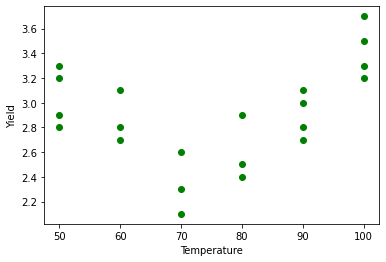

In [3]:
plt.scatter(yld["Temp"],y, color = "green")
plt.xlabel("Temperature")
plt.ylabel("Yield");

Ясно, что линейной зависимости между выходом и температурой не существует. Давайте все равно попробуем построить линию и посмотрим, как работает наша модель:

In [4]:
reg = LinearRegression().fit(yld[["Temp"]], y)

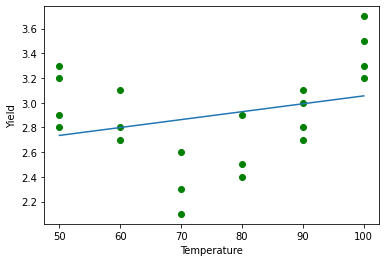

In [5]:
plt.scatter(yld["Temp"], y, color = "green")
plt.plot(yld["Temp"], reg.predict(yld[["Temp"]]))
plt.xlabel("Temperature")
plt.ylabel("Yield");

In [6]:

mean_squared_error(y, reg.predict(yld[["Temp"]]))

r2_score(y, reg.predict(yld[["Temp"]]))

0.08605718085106362

In [7]:
print('Coef: {}'.format(reg.coef_))
print('Intercept: {:.2f} (first coef)'.format(reg.intercept_))

Coef: [0.00640426]
Intercept: 2.42 (first coef)


## Квадратичное соотношение

Когда отношения между предикторами и результатом не являются линейными и демонстрируют некоторую кривизну, для получения лучших приближений можно использовать полиномы. Тогда соответствующая модель будет:


$\hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

Идея проста. Вы можете выровнять свой предиктор (здесь "Температура") и включить его в свою модель, как если бы это был новый предиктор.

Использование многочленов не ограничивается квадратичными отношениями, вы также можете исследовать полиномы любой степени. В Scikit-Learn есть встроенная опция полинома в библиотеке "предварительная обработка". 


In [20]:
y = yld["Yield"]
X = yld[["Temp"]]

# зададим степень полинома 2
poly = PolynomialFeatures(2)
X_fin = poly.fit_transform(X)

reg_poly = LinearRegression().fit(X_fin, y)
predict_X = reg_poly.predict(X_fin)

In [21]:
X_linspace = pd.DataFrame(np.linspace(50,100,50), columns = ["Temp"])
X_linspace_fin = poly.fit_transform(X_linspace)

y_poly_pred = reg_poly.predict(X_linspace_fin)

In [22]:
print('Coef: {}'.format(reg_poly.coef_))
print('Intercept: {:.2f} (first coef)'.format(reg_poly.intercept_))

Coef: [ 0.         -0.17492765  0.0012106 ]
Intercept: 8.82 (first coef)


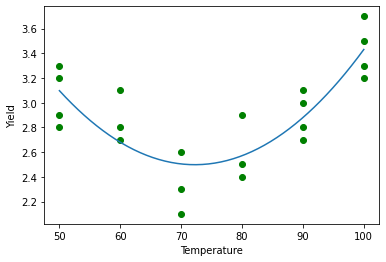

In [23]:
plt.scatter(X["Temp"],y, color = "green")
plt.plot(X_linspace,y_poly_pred)
plt.xlabel("Temperature")
plt.ylabel("Yield");

In [24]:
mean_squared_error(y, reg_poly.predict(X_fin))
r2_score(y, reg_poly.predict(X_fin))

0.6948165884110558

 Обратите внимание, что, добавляя многочлены, вы усложняете свою модель. 

Давайте посмотрим, как будет себя вести наша модель с различными степенями:

In [ ]:
meanSquare_r2=[]
X_linspace = pd.DataFrame(np.linspace(50,100,50), columns = ["Temp"])
X_linspace_fin = poly.fit_transform(X_linspace)

for i in range(1,7):
  poly = PolynomialFeatures(i)
  X_fin = poly.fit_transform(X)

  reg_poly = LinearRegression().fit(X_fin, y)
  predict_X = reg_poly.predict(X_fin)

  X_linspace_fin = poly.fit_transform(X_linspace)

  y_poly_pred = reg_poly.predict(X_linspace_fin)

  meanSquare_r2.append({'degree':i,'mean_squared_error':mean_squared_error(y, reg_poly.predict(X_fin)),'r2_score':r2_score(y, reg_poly.predict(X_fin))})


In [ ]:
for i in meanSquare_r2:
  print(i)

{'degree': 1, 'mean_squared_error': 0.13926747720364738, 'r2_score': 0.08605718085106417}
{'degree': 2, 'mean_squared_error': 0.046504138908791515, 'r2_score': 0.6948165884110558}
{'degree': 3, 'mean_squared_error': 0.0462620955155551, 'r2_score': 0.6964049981791696}
{'degree': 4, 'mean_squared_error': 0.04152104266782913, 'r2_score': 0.7275181574923714}
{'degree': 5, 'mean_squared_error': 0.03670634923698459, 'r2_score': 0.7591145831322886}
{'degree': 6, 'mean_squared_error': 0.036706349207181056, 'r2_score': 0.7591145833278743}


# Логистическая полиномиальная регрессия

In [ ]:
#@title Импорт библиотек
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/microchip_tests.txt',header=None, names = ('test1','test2','released'))
# информация о наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [ ]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

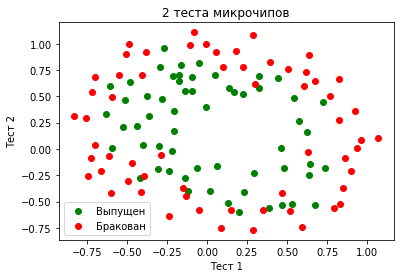

In [ ]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend();

In [ ]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
  x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
  y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
  np.arange(y_min, y_max, grid_step))

  # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
  # ставим в соответствие свой цвет
  Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [ ]:
# Обучим модель с С=0,01 (С - мера наказания. Чем больше - тем выше шанс переобучить модель; чем меньше - тем модель более обобщённая).
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

C = 1e-2
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

LogisticRegression(C=0.01, random_state=17)

Доля правильных ответов классификатора на обучающей выборке: 0.627


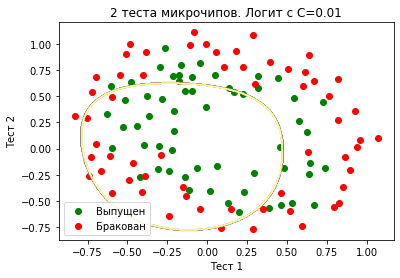

In [ ]:
plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", round(logit.score(X_poly, y), 3))

Видим, что регуляризация оказалась слишком сильной, и модель "недообучилась"

Увеличим C до 1. Тем самым мы ослабляем регуляризацию, теперь в решении значения весов логистической регрессии
 могут оказаться больше (по модулю), чем в прошлом случае.


Доля правильных ответов классификатора на обучающей выборке: 0.831


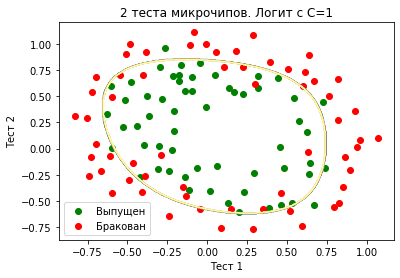

In [ ]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=1')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

In [ ]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

Доля правильных ответов классификатора на обучающей выборке: 0.873


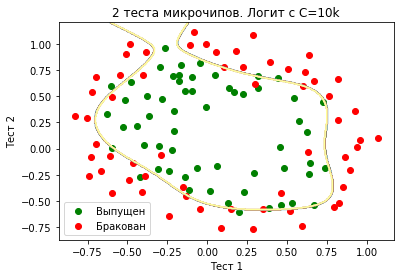

In [ ]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=10k')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

Видно, что модель переобучилась, т.к. "наказание" (С) за неверное предсказание было слошком велико.